# Insights for investing in a cab company
---

In [10]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from pywaffle import Waffle

%matplotlib inline
sb.set_style("darkgrid")

### City dataset

In [11]:
city_df = pd.read_csv('..\data\City.csv')
city_df.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [12]:
# Dataframe info
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [13]:
# Summary statistics
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,SAN FRANCISCO CA,"959,307","12,421"
freq,1,1,1


In [14]:
# Convert population and users columns of city_df to integer datatype
city_df['Population'] = city_df['Population'].str.replace(',', '').astype(int)
city_df['Users'] = city_df['Users'].str.replace(',', '').astype(int)

city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


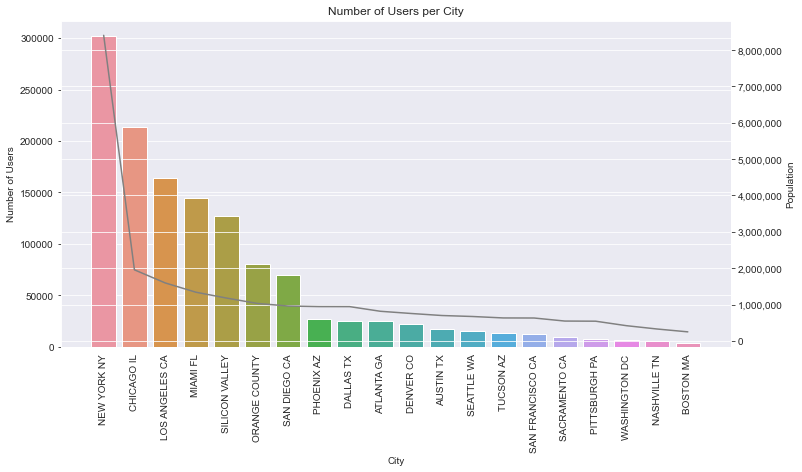

In [17]:
# Plot the number of users
plt.figure(figsize=(12, 6))
sb.barplot(x='City', y='Users', data=city_df.sort_values('Users', ascending=False))
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.title('Number of Users per City')
plt.xticks(rotation=90)

# Plot population
ax2 = plt.twinx()
sb.lineplot(x='City', y='Population', data=city_df, sort=False, color='grey', ax=ax2)
ax2.set_ylabel('Population')
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) 

plt.show()